# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
import spacy
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
import pickle
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [3]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [4]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


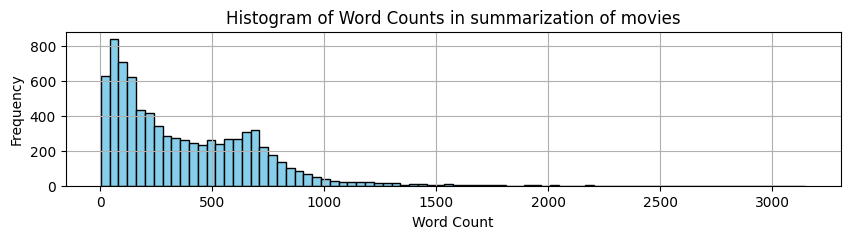

In [5]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


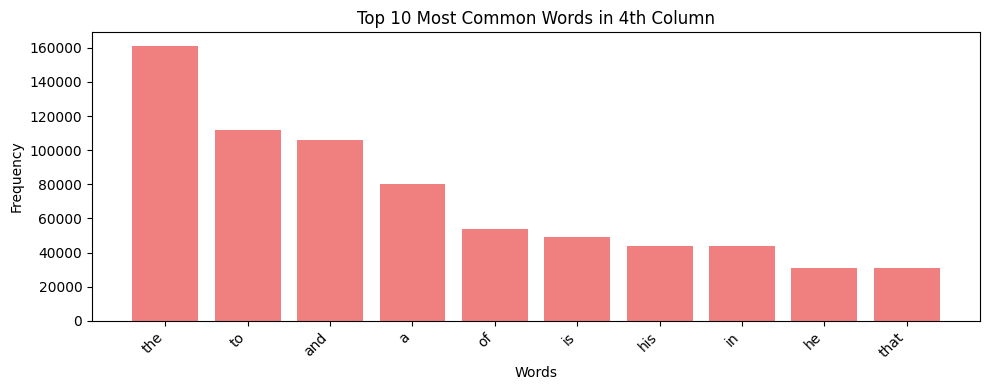

In [6]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

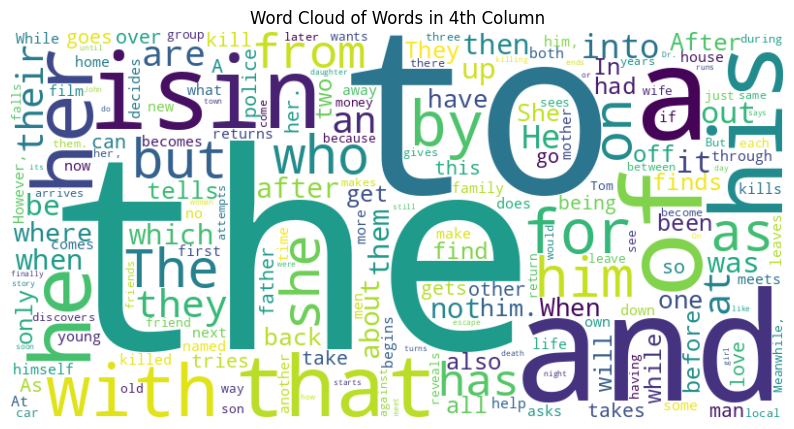

In [7]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [8]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
hangers-on
julie-8.
magnuson),
uschi
(marj
clapham,
trio,
adelaide's
ferris'
(hideki
eason
droogs
orchid),
brian's
matters.
lokanatham's
surrender.[2]
(vicky
henniker's
mankind,
val's
okuma)
sweat.
haing
manu
satyaveer
phantom,
marcella
saddle,
nato
gant
situations.
(chow)
(close),
dione's
ryder)
napoleon.
instructor,
(lassez)
financier.
sheetal.
parmino,
deverne
jamnadas's
amar,
morosky
daniella,
(miyu
judge,
vishi
mckellen),
intentional,
13,
jarboe.
there!!!.
nisha
genoa,
luc
overturns,
lea;
(kouta
priest’s
ex-boyfriends,
todday,
richards'
littlejohn
bleek
amedeo
(jim,
urgayle
तोच
haibara
o'brian,
engkanto's
increases.
bookie:
is;
seizures,
basha.
zulay's
carelli,
ralston)
(catherine
todd)
(saka)
learns,
add-ons
safer.
greers
tiger.,
weremacht,
recipe,
angelle
(bala)
haller.
cyrez
energetic.
popol
hispanics
glib-tongued
wyllie)
chorok
nayan
townfolk
qiong),
arrives,
priority.
entertain,
biography.
eats.
boyle,
jhawer),
para

## Pre Processamento

In [9]:
# Function to standardize dates
def standardize_dates(text):
    def _month_to_number(month_name):
        try:
            return datetime.strptime(month_name, "%b").month  # Abbreviated month names (e.g., "Feb")
        except ValueError:
            try:
                return datetime.strptime(month_name, "%B").month  # Full month names (e.g., "February")
            except ValueError:
                return None  # Return None for invalid month names

    def _handle_two_digit_year(year):
        if not year:  # If year is None or empty
            return ""
        year = int(year)
        return year + 2000 if year < 100 else year

    # Date normalization using regex
    text = re.sub(
        r'(\b[A-Za-z]+) (\d{1,2})(?:st|nd|rd|th)?(?:,)? (\d{4})?',
        lambda match: (
            f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}/{match.group(3)}"
            if _month_to_number(match.group(1)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}"
            if _month_to_number(match.group(1)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    # Handle formats like "8-Feb-2013"
    text = re.sub(
        r'(\d{1,2})(?:st|nd|rd|th)?[-/.](\b[A-Za-z]+)\b[-/.]?(\d{2,4})?',
        lambda match: (
            f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}/{_handle_two_digit_year(match.group(3))}"
            if _month_to_number(match.group(2)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}"
            if _month_to_number(match.group(2)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    return text

In [10]:
# lowercasing
def lowercase_text(text):
    return text.lower()

In [11]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract and return lemmatized words
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

In [12]:
# stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stop_words=stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower()]
    return " ".join(filtered_words)

In [13]:
#contractions
def expand_contractions(text):
    if not isinstance(text, str) or not text:
        # Return an empty string or the original text if it's not a valid string
        return text

    try:
        # Use contractions.fix to expand contractions in the text
        return contractions.fix(text)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        # Optionally return the original text if there's an error
        return text


In [14]:
# Remove punctuation except for specific cases like "Dr." or "Mr."
def remove_punctuation(text):
    # Replace specific abbreviations with placeholders
    text = re.sub(r'\b(Dr|Mr|Ms|Mrs)\.', r'\1_PLACEHOLDER_', text)
    
    # Remove all punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Restore the abbreviations
    text = text.replace('_PLACEHOLDER_', '.')
    
    return text

In [ ]:
def remove_references(text):
    # Substituir ".[\d]" por "."
    text = re.sub(r'\.\[\d+\]', '.', text)
    
    return text

In [15]:
print("\033[34mPre Processing the data\n\033[0m")
def preprocess_text(text):
    text = expand_contractions(text)       # Step 1: Expand contractions
    text = standardize_dates(text)         # Step 2: Normalize dates
    text = lowercase_text(text)            # Step 3: Convert to lowercase
    text = remove_punctuation(text)        # Step 4: Remove punctuation but keep specific cases
    text = remove_stopwords(text)          # Step 5: Remove stopwords
    text = lemmatize_text(text)            # Step 6: Lemmatize the text
    text = remove_references(text)         # Step 7: Remove references
    
    return text

# Example usage

df.iloc[:, 4] = df.iloc[:, 4].apply(preprocess_text)

print("\033[32mPre Processing Completed!\n\033[0m")

Pre Processing the data

IndexError encountered: string index out of range
IndexError encountered: string index out of range
Pre Processing Completed!



Average word count: 205.07


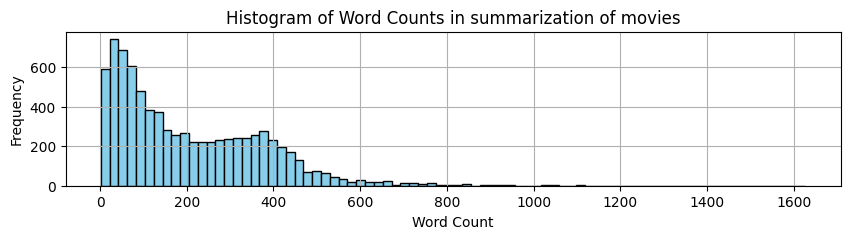

In [16]:
# histogram of word count after pre-processing
df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

find: 9095
kill: 8870
take: 8490
go: 7931
get: 7738
leave: 7424
one: 6738
tell: 6638
man: 6592
back: 5702


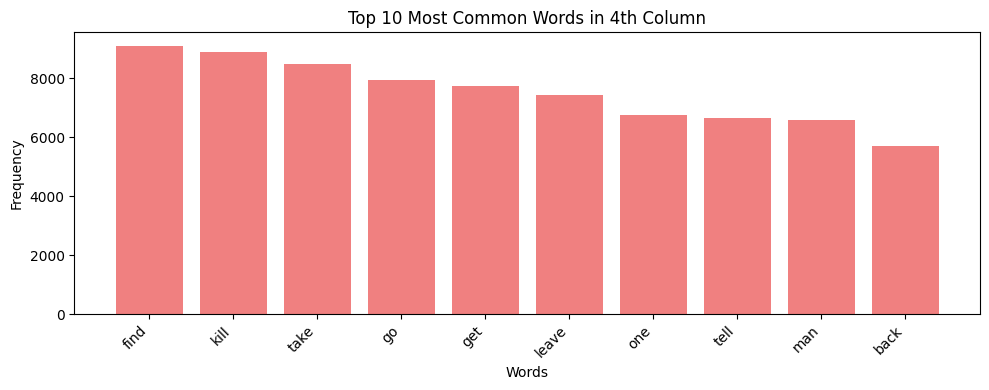

In [17]:
# Flatten all words from the 4th column into a single list after pre-processing
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

# Data after Pre Processing

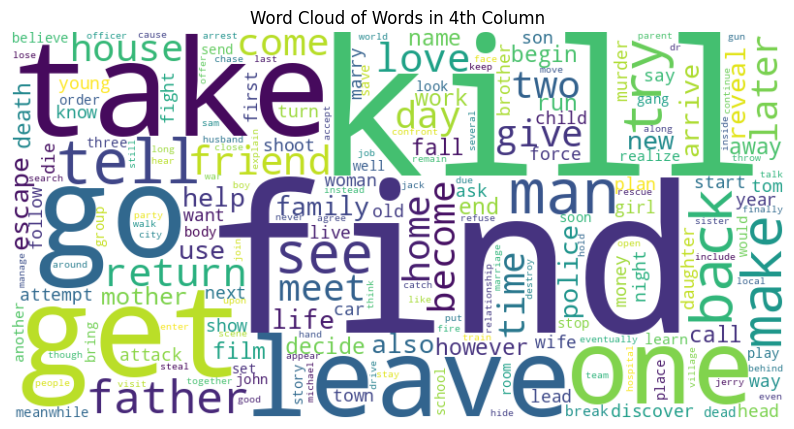

In [18]:
# Generate a word cloud after pre-processing
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

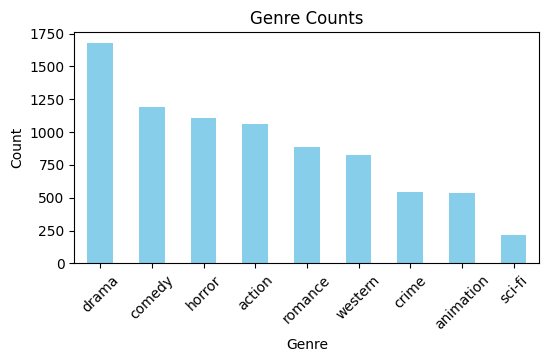

2
drama        1676
comedy       1193
horror       1108
action       1059
romance       886
western       829
crime         541
animation     535
sci-fi        214
Name: count, dtype: int64


In [30]:
genre_counts = df.iloc[:, 2].value_counts()

# Plot the histogram
plt.figure(figsize=(6, 3))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(genre_counts)

## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [19]:
def vectorize_and_encode(X_train, X_test, y_train, y_test):
    # Use TF-IDF for text vectorization (fit only on training data)
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)  # Transform test data based on training fit

    # Label binarization for one-hot encoding (fit only on training data)
    encoder = LabelBinarizer()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)  # Transform test data based on training fit

    return X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded, vectorizer, encoder

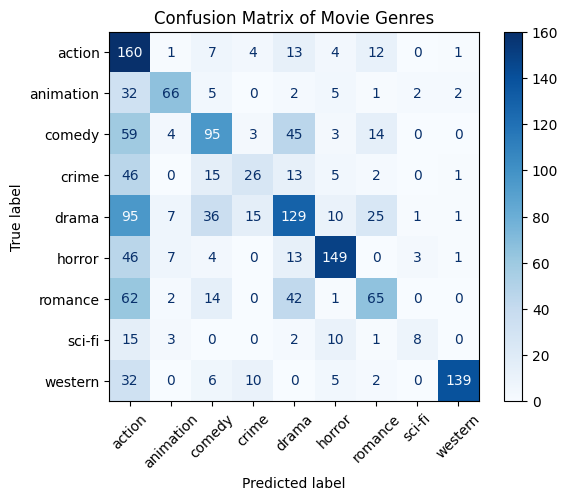

Accuracy: 0.5202
Precision: 0.5889
Recall: 0.5202
F1-Score: 0.5287


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
# Split the data into features (plots) and labels (genres)
plots = df[4].tolist()  # Assuming column 4 contains movie plots
genres = df[2].tolist()  # Assuming column 2 contains genre labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(plots, genres, test_size=0.2, random_state=42)

# Vectorize and encode only after splitting the data
X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded, vectorizer, encoder = vectorize_and_encode(X_train, X_test, y_train, y_test)

# Define the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=200, random_state=42)

# Define metrics to evaluate during cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(mlp_model, X_train_tfidf, y_train_encoded, cv=5, scoring=scoring, verbose=True)

# Train the model
mlp_model.fit(X_train_tfidf, y_train_encoded)

# Evaluate the model on the test set
y_pred_encoded = mlp_model.predict(X_test_tfidf)

# Decode numerical predictions back to genres
y_test_decoded = encoder.inverse_transform(y_test_encoded)
y_pred_decoded = encoder.inverse_transform(y_pred_encoded)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Get genre labels
genre_labels = encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=genre_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Movie Genres")
plt.xticks(rotation=45)
plt.show()

# Metrics evaluation
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
precision = precision_score(y_test_decoded, y_pred_decoded, average='weighted')
recall = recall_score(y_test_decoded, y_pred_decoded, average='weighted')
f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [21]:
texto="Romeo and Juliet is a play written by Shakespeare. It is a tragic love story where the two main characters, Romeo and Juliet, are supposed to be sworn enemies but fall in love. Due to their families' ongoing conflict, they cannot be together, so they kill themselves because they cannot cope with being separated from one another. Romeo and Juliet is a Shakespearean tragedy"
clean_texto=preprocess_text(texto)
genre="romance"
X_new = vectorizer.transform([clean_texto])  # Transform it into the TF-IDF format

# Step 3: Predict the genre using the trained MLP model
y_new_pred = mlp_model.predict(X_new)

# Step 4: Decode the predicted label to the original genre
predicted_genre = encoder.inverse_transform(y_new_pred)

print(f"Predicted genre: {predicted_genre[0]} true genre: {genre}")

Predicted genre: romance true genre: romance


In [22]:
print("\033[34mPre Processing the Our data\n\033[0m")

df_our = read_file_to_dataframe("our_data.txt")

print(df_our.head())

Pre Processing the Our data

                          0      1  \
0  The Adventures of Dollie  drama   
1           The Black Viper  drama   
2         A Christmas Carol  drama   
3              At the Altar  drama   
4  A Drunkard's Reformation  drama   

                                                   2  
0  On a beautiful summer day a father and mother ...  
1  A thug accosts a girl as she leaves her workpl...  
2  No prints of the first American film adaptatio...  
3  A rejected admirer sets up a trap to kill his ...  
4  John Wharton, the husband of a true and trusti...  


In [23]:
df_our.iloc[:, 2] = df_our.iloc[:, 2].apply(preprocess_text)
print("\033[32mPre Processing of Our Data Completed!\n\033[0m")

Pre Processing of Our Data Completed!



In [24]:
X_new = vectorizer.transform(df_our.iloc[:, 2])  # Transform it into the TF-IDF format

# Step 3: Predict the genre using the trained MLP model
y_new_pred = mlp_model.predict(X_new)

# Step 4: Decode the predicted label to the original genre
predicted_genre = encoder.inverse_transform(y_new_pred)

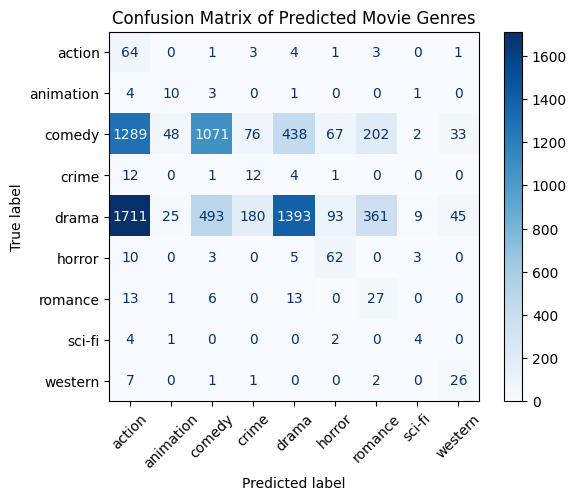

Accuracy: 0.3399
Precision: 0.6955
Recall: 0.3399
F1-Score: 0.4392


In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(df_our.iloc[:, 1], predicted_genre)

genre_labels = encoder.classes_

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=genre_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Predicted Movie Genres")
plt.xticks(rotation=45)
plt.show()

# Step 6: Evaluate the model performance
accuracy = accuracy_score(df_our.iloc[:, 1], predicted_genre)
precision = precision_score(df_our.iloc[:, 1], predicted_genre, average='weighted')
recall = recall_score(df_our.iloc[:, 1], predicted_genre, average='weighted')
f1 = f1_score(df_our.iloc[:, 1], predicted_genre, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")